## Importing Required libraries

In [271]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from math import sqrt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [272]:
# Loading the dataset
data = pd.read_csv("day.csv")

In [273]:
#Checking the dimensions of dataset
data.shape

(731, 16)

In [274]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [275]:
#Inital insight of datset
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [276]:
data.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [277]:
## Removing unnessary variables from dataset
# instant - It is basically index number
# dteday - All the values from dteday are present in datset under differnet variables
# casual and registered - cnt is basically the sum of casual amd registerd variables
data = data.drop(['instant','dteday','casual','registered'],axis=1)

In [278]:
#Creating a copy of original dataset
data_vis = data.copy()
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


In [279]:
##Converting the interger values into proper naming
data_vis['season'] = data_vis['season'].replace([1,2,3,4],['Springer','summer','fall','winter'])
data_vis['yr'] = data_vis['yr'].replace([0,1],[2011,2012])
data_vis['weathersit'] = data_vis['weathersit'].replace([1,2,3,4],[' Clear+Few clouds+Partly cloudy','Mist + Cloudy, Mist + Broken clouds, ',' Light Snow, Light Rain + Thunderstorm ','Heavy Rain + Ice Pallets '])
data_vis['holiday'] = data_vis['holiday'].replace([0,1],['working Day','Holiday'])
data_vis.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Springer,2011,1,working Day,6,0,"Mist + Cloudy, Mist + Broken clouds,",0.344167,0.363625,0.805833,0.160446,985
1,Springer,2011,1,working Day,0,0,"Mist + Cloudy, Mist + Broken clouds,",0.363478,0.353739,0.696087,0.248539,801
2,Springer,2011,1,working Day,1,1,Clear+Few clouds+Partly cloudy,0.196364,0.189405,0.437273,0.248309,1349
3,Springer,2011,1,working Day,2,1,Clear+Few clouds+Partly cloudy,0.200000,0.212122,0.590435,0.160296,1562
4,Springer,2011,1,working Day,3,1,Clear+Few clouds+Partly cloudy,0.226957,0.229270,0.436957,0.186900,1600


In [280]:
print(data.dtypes)
print(data.head())

season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object
   season  yr  mnth  holiday  weekday  workingday  weathersit      temp  \
0       1   0     1        0        6           0           2  0.344167   
1       1   0     1        0        0           0           2  0.363478   
2       1   0     1        0        1           1           1  0.196364   
3       1   0     1        0        2           1           1  0.200000   
4       1   0     1        0        3           1           1  0.226957   

      atemp       hum  windspeed   cnt  
0  0.363625  0.805833   0.160446   985  
1  0.353739  0.696087   0.248539   801  
2  0.189405  0.437273   0.248309  1349  
3  0.212122  0.590435   0.160296  1562  
4  0.229270  0.436957   0.186900  1600  


## Univarient Analysis

C:\Users\amolp\AppData\Local\Continuum\anaconda3\envs\tensorflow_gpu\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\amolp\AppData\Local\Continuum\anaconda3\envs\tensorflow_gpu\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


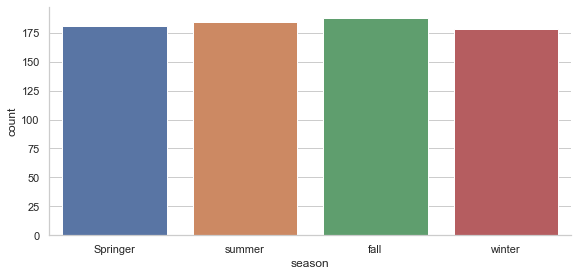

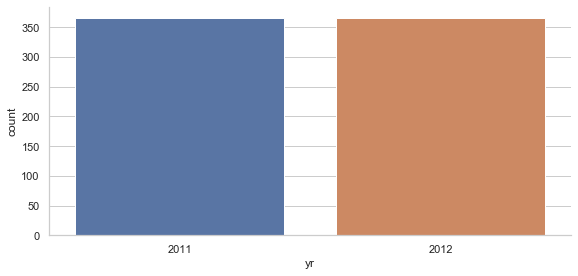

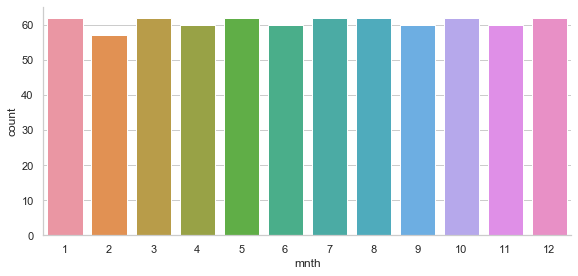

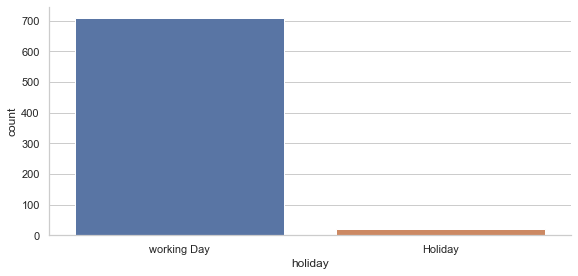

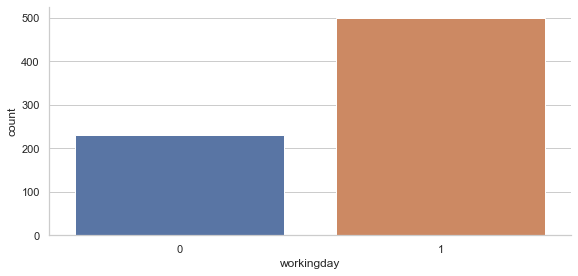

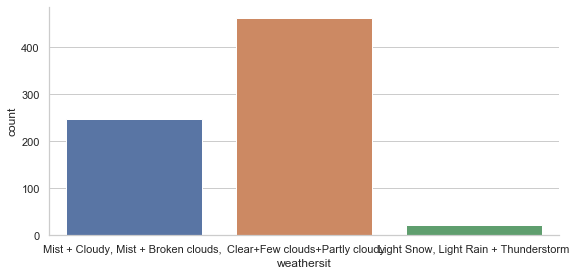

In [281]:
## Bar Graph for Categorical data

sns.set_style("whitegrid")
sns.factorplot(data=data_vis,x='season',kind='count',size=4,aspect=2)
sns.factorplot(data=data_vis,x='yr',kind='count',size=4,aspect=2)
sns.factorplot(data=data_vis,x='mnth',kind='count',size=4,aspect=2)
sns.factorplot(data=data_vis,x='holiday',kind='count',size=4,aspect=2)
sns.factorplot(data=data_vis,x='workingday',kind='count',size=4,aspect=2)
sns.factorplot(data=data_vis,x='weathersit',kind='count',size=4,aspect=2)

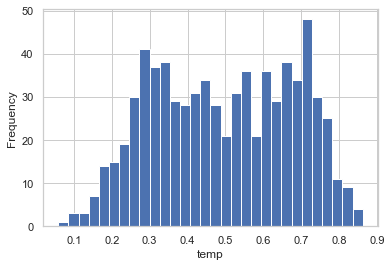

In [282]:
plt.hist(data_vis['temp'],bins=30)
plt.xlabel('temp')
plt.ylabel('Frequency')
plt.show()

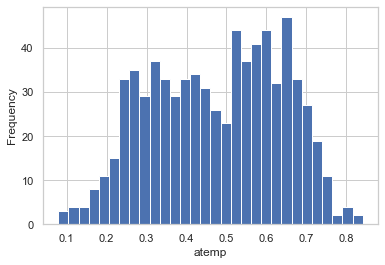

In [283]:
plt.hist(data_vis['atemp'],bins=30)
plt.xlabel('atemp')
plt.ylabel('Frequency')
plt.show()

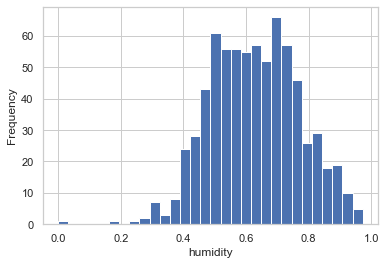

In [284]:
plt.hist(data_vis['hum'],bins=30)
plt.xlabel('humidity')
plt.ylabel('Frequency')
plt.show()

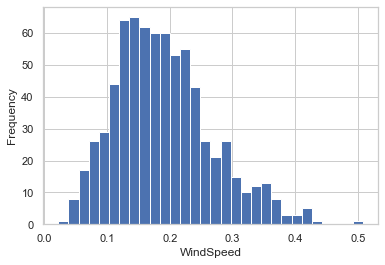

In [285]:
plt.hist(data_vis['windspeed'],bins=30)
plt.xlabel('WindSpeed')
plt.ylabel('Frequency')
plt.show()

In [286]:
#Dimensions of dataset after removing outliers
data.shape

(731, 12)

## Bivariant Analysis

In [287]:
##  Using Scatter Plot
# Index(['instant', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
#        'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
#        'registered', 'cnt'],
#       dtype='object')

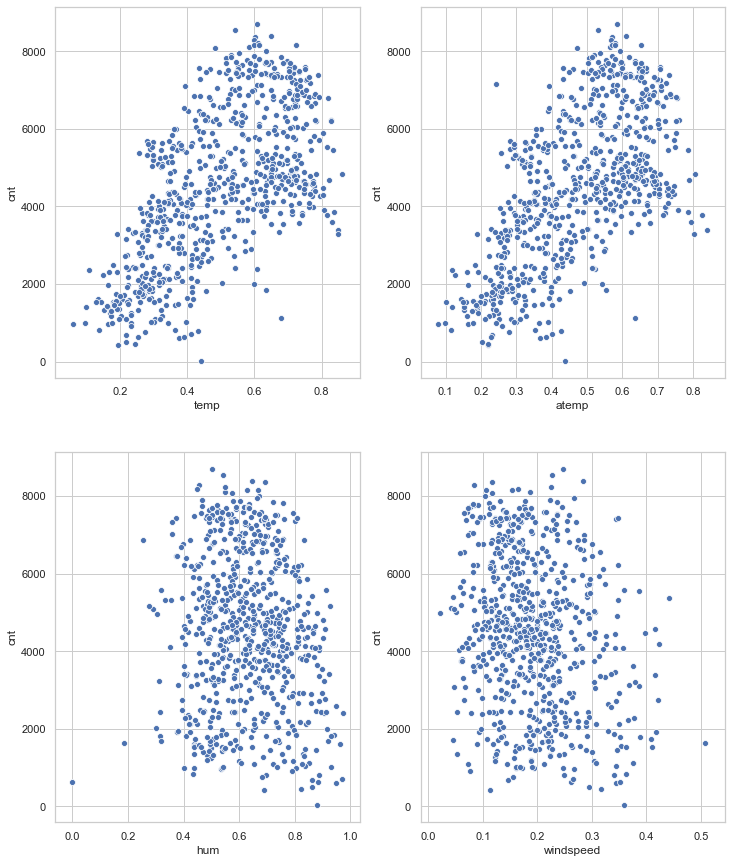

In [288]:
fig,x = plt.subplots(nrows= 2,ncols=2)
fig.set_size_inches(12,15)
sns.scatterplot(x="temp",y = "cnt",data = data_vis,palette="Set3",ax=x[0][0])
sns.scatterplot(x="atemp",y = "cnt",data = data_vis,palette="Set3",ax=x[0][1])
sns.scatterplot(x="hum",y = "cnt",data = data_vis,palette="Set3",ax=x[1][0])
sns.scatterplot(x="windspeed",y = "cnt",data = data_vis,palette="Set3",ax=x[1][1])

## Outlier Analysis

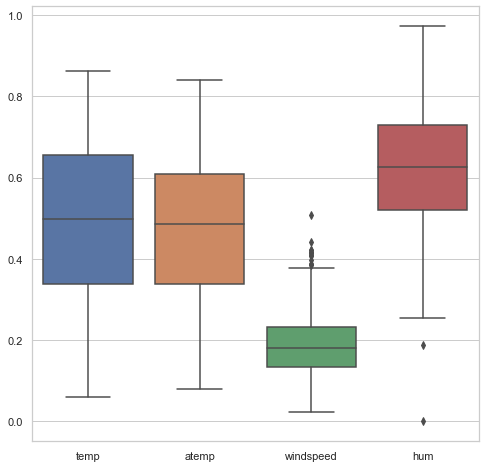

In [289]:
## Checking the presence of outlier in continous variables
sns.boxplot(data = data[['temp','atemp','windspeed','hum']])
fig  = plt.gcf()
fig.set_size_inches(8,8)

In [290]:
## Removing outlier and checking correlation between target variable and independent continous variables

print(data.shape)
print(data['hum'].corr(data['cnt']))
print(data['windspeed'].corr(data['cnt']))

q75, q25 = np.percentile(data.loc[:,'hum'],[75,25])
iqr = q75 - q25

min = q25-(iqr*1.5)
max = q75+(iqr*1.5)

 
print(min)
print(max)

data = data.drop(data[data.loc[:,'hum']<min].index)
data = data.drop(data[data.loc[:,'hum']>max].index)


q75, q25 = np.percentile(data.loc[:,'windspeed'],[75,25])
iqr = q75 - q25

min = q25-(iqr*1.5)
max = q75+(iqr*1.5)

 
print(min)
print(max)

data = data.drop(data[data.loc[:,'windspeed']<min].index)
data = data.drop(data[data.loc[:,'windspeed']>max].index)

(731, 12)
-0.10065856213715531
-0.23454499742167
0.20468725
1.0455212500000002
-0.012431000000000025
0.380585


## Missing Value Analysis

In [291]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(30)

# There are no missing vlaues present after outlier analysis

,Total,Percent
cnt,0,0.0
windspeed,0,0.0
hum,0,0.0
atemp,0,0.0
temp,0,0.0
weathersit,0,0.0
workingday,0,0.0
weekday,0,0.0
holiday,0,0.0
mnth,0,0.0


## Feature Selection

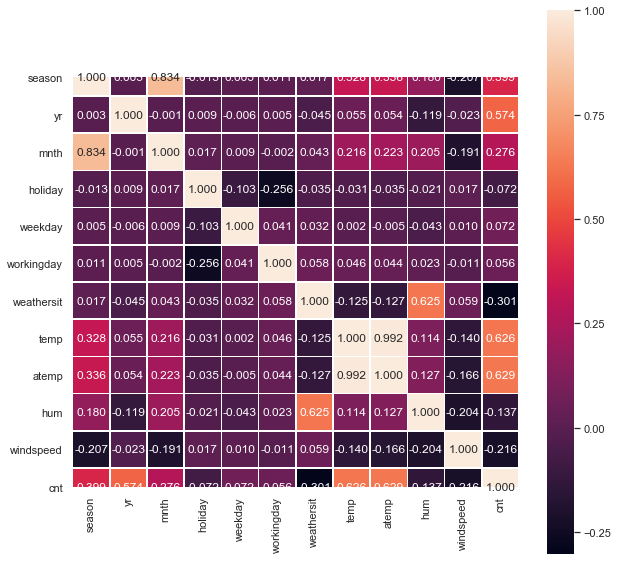

In [292]:
def Correlation(df):
    df_corr = df.loc[:,df.columns]
    corr = df_corr.corr()
    sns.set()
    plt.figure(figsize=(10,10))
    sns.heatmap(corr,annot=True,fmt=".3f",square=True,linewidths=0.5)

    
Correlation(data)

In [293]:
## There is high correlation between temp and atemp variable
## there is very weak relation between holiday, weekday and working day variables
## So we will drop those variables
data_fs = data.drop(['atemp','holiday','weekday','workingday'],axis=1)
data_fs.head()

,season,yr,mnth,weathersit,temp,hum,windspeed,cnt
0,1,0,1,2,0.344167,0.805833,0.160446,985
1,1,0,1,2,0.363478,0.696087,0.248539,801
2,1,0,1,1,0.196364,0.437273,0.248309,1349
3,1,0,1,1,0.200000,0.590435,0.160296,1562
4,1,0,1,1,0.226957,0.436957,0.186900,1600


In [294]:
# Splitting Dataset into train and test dataset

train,test = train_test_split(data_fs,test_size=0.2,random_state=121)

## Feature Scaling 

In [295]:
## Data is normalized no need to do feature scaling
train.head()

,season,yr,mnth,weathersit,temp,hum,windspeed,cnt
48,1,0,2,1,0.521667,0.516667,0.264925,2927
707,4,1,12,2,0.381667,0.911250,0.101379,5582
426,1,1,3,2,0.353333,0.657083,0.144904,3194
27,1,0,1,2,0.203478,0.793043,0.123300,1167
644,4,1,10,1,0.554167,0.664167,0.268025,7965


## Error Metrics 

In [296]:
## Defining Performance Metrics

def MAPE(y_true, y_pred):
    MAE = np.mean(np.abs((y_true - y_pred)))
    mape = np.mean(np.abs((y_true - y_pred) / y_true))
    print("MAE is:", MAE)
    print("MAPE is:", mape)
    return mape

def RMSE(y_true, y_pred):
    mse = np.mean((y_true - y_pred)**2)
    rmse = np.sqrt(mse)
    print("MSE: ",mse)
    print("RMSE: ",rmse)
    return rmse
    

## Linear Regression 

In [297]:
LR_model = sm.OLS(train.iloc[:,7],train.iloc[:,0:6]).fit()

#Summary
print(LR_model.summary())

#Predict
LR_Model_predict = LR_model.predict(test.iloc[:,0:6])

                                 OLS Regression Results                                
Dep. Variable:                    cnt   R-squared (uncentered):                   0.964
Model:                            OLS   Adj. R-squared (uncentered):              0.964
Method:                 Least Squares   F-statistic:                              2560.
Date:                Tue, 10 Dec 2019   Prob (F-statistic):                        0.00
Time:                        16:13:16   Log-Likelihood:                         -4733.1
No. Observations:                 573   AIC:                                      9478.
Df Residuals:                     567   BIC:                                      9504.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [298]:
MAPE(test.iloc[:,7],LR_Model_predict)
RMSE(test.iloc[:,7],LR_Model_predict)

MAE is: 687.0163959661395
MAPE is: 0.20885213428211127
MSE:  872516.0100288191
RMSE:  934.0856545461016


934.0856545461016

In [299]:
result = pd.DataFrame({'Actual Value':test.iloc[:,7],'Linear Regression':LR_Model_predict})
result.head()

,Actual Value,Linear Regression
604,6917,7291.567339
224,4150,4427.587638
455,6235,4701.494773
452,5698,5573.265167
580,7175,7051.872476


## Desicion Tree

In [300]:
DT_model = DecisionTreeRegressor(random_state=100).fit(train.iloc[:,0:6],train.iloc[:,7])

#prediction
DT_model_predict = DT_model.predict(test.iloc[:,0:6],DT_model)

In [301]:
MAPE(test.iloc[:,7],DT_model_predict)
RMSE(test.iloc[:,7],DT_model_predict)

MAE is: 656.6944444444445
MAPE is: 0.1830472200529958
MSE:  871873.0277777778
RMSE:  933.7414137638845


933.7414137638845

In [302]:
result['Desicion Tree'] = DT_model_predict
result.head()

,Actual Value,Linear Regression,Desicion Tree
604,6917,7291.567339,6530.0
224,4150,4427.587638,4153.0
455,6235,4701.494773,3510.0
452,5698,5573.265167,5298.0
580,7175,7051.872476,5464.0


## Random Forest

In [303]:
RF_model = RandomForestRegressor(random_state=123)
np.random.seed(10)

arg_dict = {'max_depth':[2,4,6,8,10],
           'bootstrap':[True,False],
           'max_features':['auto','sqrt','log2',None],
           'n_estimators':[100,200,300,400,500]}

gs_randomForest = RandomizedSearchCV(RF_model,cv=10,param_distributions=arg_dict,
                                    n_iter=10)

gs_randomForest.fit(train.iloc[:,0:6],train.iloc[:,7])
print("Best Parameters using random Search",
     gs_randomForest.best_params_)

Best Parameters using random Search {'n_estimators': 500, 'max_features': 'sqrt', 'max_depth': 8, 'bootstrap': True}


In [304]:
RF_model.set_params(n_estimators = 500,
                   max_features='sqrt',
                   max_depth=8,
                   bootstrap=True)
RF_model.fit(train.iloc[:,0:6],train.iloc[:,7])
RF_model_predict = RF_model.predict(test.iloc[:,0:6])

In [305]:
MAPE(test.iloc[:,7],RF_model_predict)
RMSE(test.iloc[:,7],RF_model_predict)

MAE is: 498.20171825789504
MAPE is: 0.15936661694112925
MSE:  469755.8793950975
RMSE:  685.3873936651429


685.3873936651429

In [306]:
result['Random Forest'] = RF_model_predict
result.head()

,Actual Value,Linear Regression,Desicion Tree,Random Forest
604,6917,7291.567339,6530.0,6787.512252
224,4150,4427.587638,4153.0,4344.350449
455,6235,4701.494773,3510.0,4686.414393
452,5698,5573.265167,5298.0,6146.898826
580,7175,7051.872476,5464.0,6796.559420


From above models Random forest is performing well according to RMSE values

In [307]:
#Saving the result of test data onto local machine
result.to_csv("Test_Result_python.csv",index=False)